In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
digit_data = pd.read_csv('digit_svm.csv')

In [ ]:
digit_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
digit_data.shape

(4011, 785)

In [ ]:
digit_data.iloc[0, 1:]

pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Name: 0, Length: 784, dtype: float64

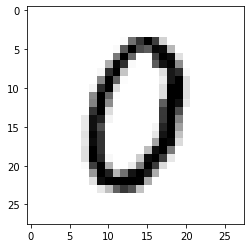

In [ ]:
plt.imshow(np.asarray(digit_data.iloc[5, 1:]).reshape(28,28), cmap='binary')

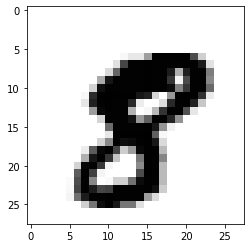

In [ ]:
plt.imshow(np.asarray(digit_data.iloc[10, 1:]).reshape(28,28), cmap='binary')

In [ ]:
X = digit_data.drop(['label'], axis=1)
y = digit_data.label

In [ ]:
y.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [ ]:
X_arr = np.asarray(X)

In [ ]:
X_arr.shape

(4011, 784)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_arr, y, test_size=4200, random_state=42)

ValueError: ignored

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=4200, random_state=42)

NameError: ignored

In [ ]:
X_train.shape, X_val.shape, X_test.shape

NameError: ignored

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

In [ ]:
lin_svm_clf = LinearSVC(multi_class='ovr',random_state=42) # we can use SVC(kernel='linear') but its slower than LinearSVC
poly_svm_clf = SVC(kernel='poly')
rbf_svm_clf = SVC(kernel='rbf')   # rbf is default anyway

In [ ]:
lin_svm_clf.fit(X_train, y_train)
poly_svm_clf.fit(X_train, y_train)
rbf_svm_clf.fit(X_train, y_train)

C:\Users\prati\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


SVC()

In [ ]:
# Evaluation
from sklearn.metrics import accuracy_score

#### LinearSVC

In [ ]:
# evaluating on train set
y_pred_lin = lin_svm_clf.predict(X_train)
accuracy_score(y_train, y_pred_lin)

0.8726488095238095

In [ ]:
# evaluating on validation set
y_val_pred_lin = lin_svm_clf.predict(X_val)
accuracy_score(y_val, y_val_pred_lin)

0.8526190476190476

#### Poly SVC

In [ ]:
# evaluating on train set
y_pred_poly = poly_svm_clf.predict(X_train)
accuracy_score(y_train, y_pred_poly)

0.9907440476190477

In [ ]:
# evaluating on validation set
y_val_pred_poly = poly_svm_clf.predict(X_val)
accuracy_score(y_val, y_val_pred_poly)

0.9742857142857143

#### RBF SVC

In [ ]:
# evaluating on train set
y_pred_rbf = rbf_svm_clf.predict(X_train)
accuracy_score(y_train, y_pred_rbf)

0.9883035714285714

In [ ]:
# evaluating on validation set
y_val_pred_rbf = rbf_svm_clf.predict(X_val)
accuracy_score(y_val, y_val_pred_rbf)

0.9769047619047619

##### We can see that the models are slightly overfitting the training set
> Performance on validation dataset is worse than training dataset

## SVM works better if the data it is training on is scaled, but this is not guaranteed . The model may perform worse after the data is scaled. That is why we should try creating a model before scaling.

## Lets use Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled= scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### LinearSVC

In [ ]:
lin_svm_clf.fit(X_train_scaled, y_train)

C:\Users\prati\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=42)

In [ ]:
# evaluating on train set
y_pred_lin = lin_svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred_lin)

0.932202380952381

In [ ]:
# evaluating on validation set
y_val_pred_lin = lin_svm_clf.predict(X_val_scaled)
accuracy_score(y_val, y_val_pred_lin)

0.9104761904761904

##### Scaling the data definitely helped Linear SVM classifier

Lets check for SVM with polynomial kernel

#### Poly SVC

In [ ]:
poly_svm_clf.fit(X_train_scaled, y_train)

SVC(kernel='poly')

In [ ]:
# evaluating on train set
y_pred_poly = poly_svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred_poly)

0.9717559523809524

In [ ]:
# evaluating on validation set
y_val_pred_poly = poly_svm_clf.predict(X_val_scaled)
accuracy_score(y_val, y_val_pred_poly)

0.9507142857142857

##### Scaling the data did not help this model(SVC(kernel='poly')) rather it made it worse.

Lets check for SVM with rbf(Radial Basis Function) kernel

#### RBF SVC

In [ ]:
rbf_svm_clf.fit(X_train_scaled, y_train)

SVC()

In [ ]:
# evaluating on train set
y_pred_rbf = rbf_svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred_rbf)

0.9849404761904762

In [ ]:
# evaluating on validation set
y_val_pred_rbf = rbf_svm_clf.predict(X_val_scaled)
accuracy_score(y_val, y_val_pred_rbf)

0.9614285714285714

##### Scaling the data did not help this model(SVC(kernel='rbf')) rather it made it worse.

### Linear svm model benifitted from scaling but Poly and RBF models did not but wait there are other parameters(hyperparamters) that define a model. So Poly and RBF models might still do better(with scaled data) after a few changes in the parameters.